In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
data=pd.read_csv("sales.csv")
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [4]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

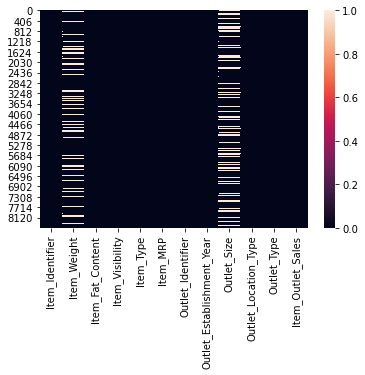

In [5]:
sns.heatmap(data.isnull())

In [6]:
data["Item_Weight"]=data["Item_Weight"].replace(np.NaN,data["Item_Weight"].mean())
data["Outlet_Size"]=data["Outlet_Size"].replace(np.NaN,1)

In [7]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [8]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
data["Item_Fat_Content"]=pd.factorize(data.Item_Fat_Content)[0]
data["Item_Type"]=pd.factorize(data.Item_Type)[0]
data["Outlet_Identifier"]=pd.factorize(data.Outlet_Identifier)[0]
data["Outlet_Size"]=pd.factorize(data.Outlet_Size)[0]
data["Outlet_Location_Type"]=pd.factorize(data.Outlet_Location_Type)[0]
data["Outlet_Type"]=pd.factorize(data.Outlet_Type)[0]

In [10]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,0,249.8092,0,1999,0,0,0,3735.1380
1,DRC01,5.920,1,0.019278,1,48.2692,1,2009,0,1,1,443.4228
2,FDN15,17.500,0,0.016760,2,141.6180,0,1999,0,0,0,2097.2700
3,FDX07,19.200,1,0.000000,3,182.0950,2,1998,1,1,2,732.3800
4,NCD19,8.930,0,0.000000,4,53.8614,3,1987,2,1,0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,6,214.5218,3,1987,2,1,0,2778.3834
8519,FDS36,8.380,1,0.046982,5,108.1570,5,2002,1,2,0,549.2850
8520,NCJ29,10.600,0,0.035186,9,85.1224,8,2004,3,2,0,1193.1136
8521,FDN46,7.210,1,0.145221,6,103.1332,1,2009,0,1,1,1845.5976


In [11]:
data.drop(["Item_Identifier","Outlet_Identifier"],axis=1,inplace=True)

In [12]:
data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,0,249.8092,1999,0,0,0,3735.1380
1,5.920,1,0.019278,1,48.2692,2009,0,1,1,443.4228
2,17.500,0,0.016760,2,141.6180,1999,0,0,0,2097.2700
3,19.200,1,0.000000,3,182.0950,1998,1,1,2,732.3800
4,8.930,0,0.000000,4,53.8614,1987,2,1,0,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,6,214.5218,1987,2,1,0,2778.3834
8519,8.380,1,0.046982,5,108.1570,2002,1,2,0,549.2850
8520,10.600,0,0.035186,9,85.1224,2004,3,2,0,1193.1136
8521,7.210,1,0.145221,6,103.1332,2009,0,1,1,1845.5976


In [13]:
data.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.531386,0.066132,5.651062,140.992782,1997.831867,1.342016,1.046580,0.692127,2181.288914
std,4.226124,0.813979,0.051598,3.669141,62.275067,8.371760,1.200408,0.777719,1.060931,1706.499616
min,4.555000,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,9.310000,0.000000,0.026989,3.000000,93.826500,1987.000000,0.000000,0.000000,0.000000,834.247400
50%,12.857645,0.000000,0.053931,5.000000,143.012800,1999.000000,1.000000,1.000000,0.000000,1794.331000
75%,16.000000,1.000000,0.094585,7.000000,185.643700,2004.000000,3.000000,2.000000,1.000000,3101.296400
max,21.350000,4.000000,0.328391,15.000000,266.888400,2009.000000,3.000000,2.000000,3.000000,13086.964800


Item_Weight                     AxesSubplot(0.125,0.657941;0.168478x0.222059)
Item_Fat_Content             AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Item_Visibility              AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Item_Type                    AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Item_MRP                        AxesSubplot(0.125,0.391471;0.168478x0.222059)
Outlet_Establishment_Year    AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Outlet_Size                  AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Outlet_Location_Type         AxesSubplot(0.731522,0.391471;0.168478x0.222059)
Outlet_Type                        AxesSubplot(0.125,0.125;0.168478x0.222059)
Item_Outlet_Sales               AxesSubplot(0.327174,0.125;0.168478x0.222059)
dtype: object

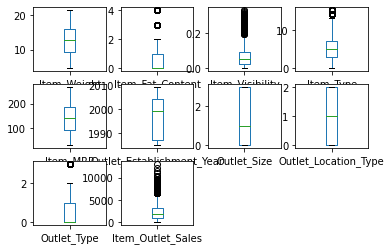

In [14]:
data.plot(kind="box",subplots=True,layout=(3,4))

In [15]:
z=np.abs(zscore(data))
np.where(z>3)

(array([  45,   49,   65,   81,   83,  108,  121,  130,  145,  151,  174,
         175,  199,  207,  210,  219,  238,  276,  304,  333,  339,  373,
         389,  396,  415,  434,  439,  455,  456,  472,  481,  489,  502,
         504,  507,  521,  524,  532,  551,  589,  610,  615,  621,  661,
         677,  694,  727,  753,  753,  805,  809,  838,  851,  854,  891,
         905,  935,  946,  948,  991,  997, 1003, 1009, 1010, 1021, 1034,
        1051, 1086, 1090, 1104, 1116, 1118, 1124, 1133, 1138, 1159, 1179,
        1183, 1209, 1254, 1272, 1278, 1286, 1291, 1305, 1311, 1321, 1324,
        1335, 1372, 1393, 1403, 1433, 1434, 1445, 1450, 1460, 1496, 1501,
        1506, 1512, 1542, 1549, 1551, 1560, 1575, 1576, 1589, 1615, 1617,
        1632, 1640, 1644, 1651, 1653, 1655, 1661, 1680, 1684, 1690, 1693,
        1723, 1753, 1769, 1780, 1802, 1805, 1827, 1827, 1828, 1841, 1841,
        1849, 1859, 1865, 1869, 1913, 1945, 1953, 1955, 1978, 1985, 1998,
        2024, 2028, 2043, 2048, 2056, 

In [16]:
df=data[(z<3).all(axis=1)]

In [17]:
df.skew()

Item_Weight                  0.084876
Item_Fat_Content             0.782173
Item_Visibility              0.794152
Item_Type                    0.463137
Item_MRP                     0.139012
Outlet_Establishment_Year   -0.421156
Outlet_Size                  0.289578
Outlet_Location_Type        -0.093446
Outlet_Type                  1.261282
Item_Outlet_Sales            0.880897
dtype: float64

In [18]:
df["Outlet_Type"]=np.log1p(df.Outlet_Type)

<ipython-input-18-47a809ada534>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Outlet_Type"]=np.log1p(df.Outlet_Type)


In [19]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,0,249.8092,1999,0,0,0.000000,3735.1380
1,5.920,1,0.019278,1,48.2692,2009,0,1,0.693147,443.4228
2,17.500,0,0.016760,2,141.6180,1999,0,0,0.000000,2097.2700
3,19.200,1,0.000000,3,182.0950,1998,1,1,1.098612,732.3800
4,8.930,0,0.000000,4,53.8614,1987,2,1,0.000000,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,6,214.5218,1987,2,1,0.000000,2778.3834
8519,8.380,1,0.046982,5,108.1570,2002,1,2,0.000000,549.2850
8520,10.600,0,0.035186,9,85.1224,2004,3,2,0.000000,1193.1136
8521,7.210,1,0.145221,6,103.1332,2009,0,1,0.693147,1845.5976


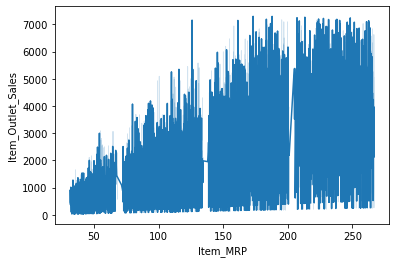

In [33]:
sns.lineplot(x=df["Item_MRP"],y=df["Item_Outlet_Sales"],data=df)

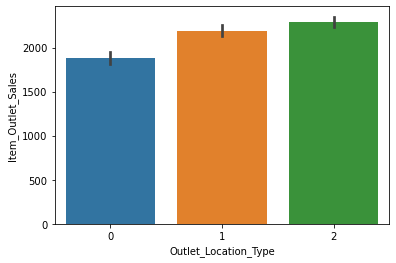

In [21]:
sns.barplot(x=df["Outlet_Location_Type"],y=df["Item_Outlet_Sales"],data=df)

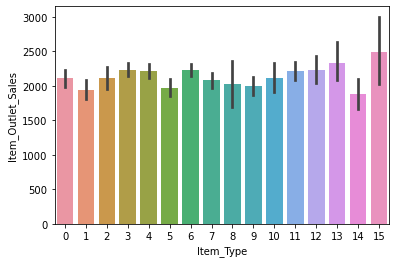

In [22]:
sns.barplot(x=df["Item_Type"],y=df["Item_Outlet_Sales"],data=df)

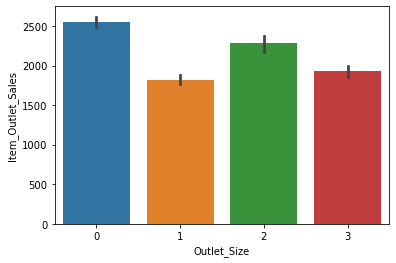

In [23]:
sns.barplot(x=df["Outlet_Size"],y=df["Item_Outlet_Sales"],data=df)

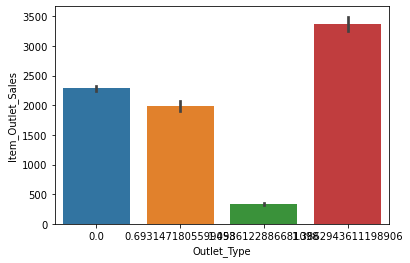

In [24]:
sns.barplot(x=df["Outlet_Type"],y=df["Item_Outlet_Sales"],data=df)

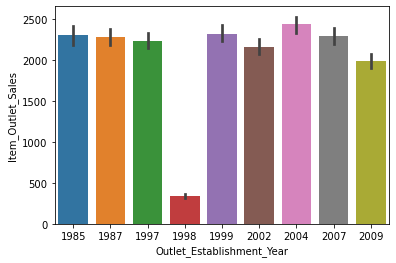

In [25]:
sns.barplot(x=df["Outlet_Establishment_Year"],y=df["Item_Outlet_Sales"],data=df)

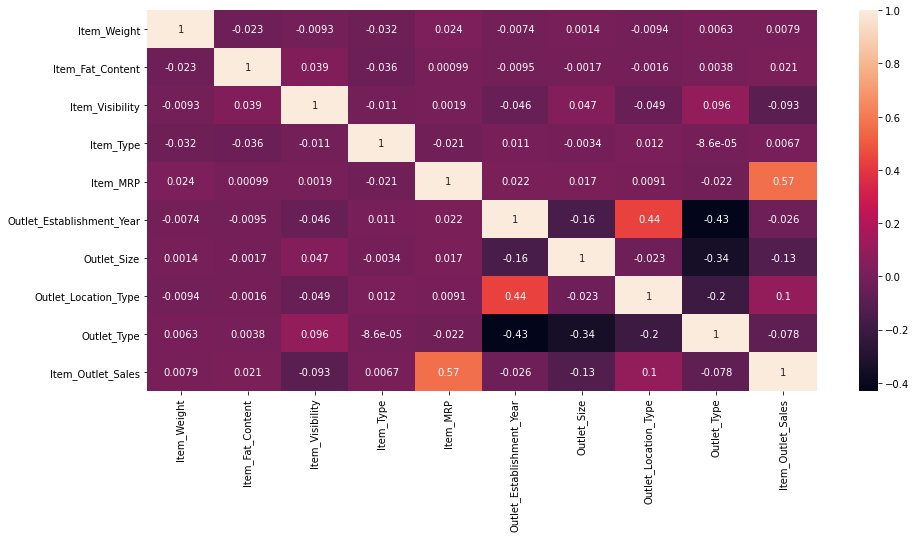

In [26]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

In [39]:
df.drop(["Item_Type","Item_Weight"],axis=1,inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [40]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [41]:
sc=StandardScaler()
x=sc.fit_transform(X)
x

array([[-0.7463455 , -1.01362058,  1.77037909, ..., -1.12064518,
        -1.3487613 , -0.6724679 ],
       [ 1.20005471, -0.9453949 , -1.4851387 , ..., -1.12064518,
        -0.06842481,  0.65185107],
       [-0.7463455 , -0.99856928,  0.022744  , ..., -1.12064518,
        -1.3487613 , -0.6724679 ],
       ...,
       [-0.7463455 , -0.60947215, -0.88984125, ...,  1.38238556,
         1.21191168, -0.6724679 ],
       [ 1.20005471,  1.71407088, -0.59890903, ..., -1.12064518,
        -0.06842481,  0.65185107],
       [-0.7463455 , -0.40481065, -1.04580694, ...,  1.38238556,
        -1.3487613 , -0.6724679 ]])

In [42]:
x=pd.DataFrame(x,columns=X.columns)
x

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.746345,-1.013621,1.770379,0.123835,-1.120645,-1.348761,-0.672468
1,1.200055,-0.945395,-1.485139,1.325892,-1.120645,-0.068425,0.651851
2,-0.746345,-0.998569,0.022744,0.123835,-1.120645,-1.348761,-0.672468
3,1.200055,-1.352484,0.676577,0.003630,-0.286302,-0.068425,1.426528
4,-0.746345,-1.352484,-1.394807,-1.318632,0.548042,-0.068425,-0.672468
...,...,...,...,...,...,...,...
7910,-0.746345,-0.153416,1.200374,-1.318632,0.548042,-0.068425,-0.672468
7911,1.200055,-0.360378,-0.517759,0.484452,-0.286302,1.211912,-0.672468
7912,-0.746345,-0.609472,-0.889841,0.724864,1.382386,1.211912,-0.672468
7913,1.200055,1.714071,-0.598909,1.325892,-1.120645,-0.068425,0.651851


In [43]:
max_r=0
for r in range(40,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.23,random_state=r)
    lg=LinearRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>max_r:
        max_r=r2
        final_r=r
print("max r2 score corresponding to",final_r,"is",max_r) 
print("MSE:",np.sqrt(mean_squared_error(y_test,pred)))

max r2 score corresponding to 103 is 0.4339044618454653
MSE: 1225.2020757391147


In [44]:
max_r=0
for r in range(40,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.23,random_state=r)
    kn=KNeighborsRegressor()
    kn.fit(x_train,y_train)
    pred=kn.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>max_r:
        max_r=r2
        final_r=r
print("max r2 score corresponding to",final_r,"is",max_r) 
print("MSE:",np.sqrt(mean_squared_error(y_test,pred)))

max r2 score corresponding to 110 is 0.5613216780166966
MSE: 1094.0681044914008


In [47]:
from sklearn.linear_model import ElasticNet

max_r=0
for r in range(40,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.23,random_state=r)
    el=ElasticNet(alpha=0.001)
    el.fit(x_train,y_train)
    pred=el.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>max_r:
        max_r=r2
        final_r=r
print("max r2 score corresponding to",final_r,"is",max_r) 
print("MSE:",np.sqrt(mean_squared_error(y_test,pred)))

max r2 score corresponding to 103 is 0.43387842313003544
MSE: 1225.1704016207398


In [48]:
from sklearn.ensemble import AdaBoostRegressor

max_r=0
for r in range(40,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.23,random_state=r)
    ad=AdaBoostRegressor()
    ad.fit(x_train,y_train)
    pred=ad.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>max_r:
        max_r=r2
        final_r=r
print("max r2 score corresponding to",final_r,"is",max_r) 
print("MSE:",np.sqrt(mean_squared_error(y_test,pred)))

max r2 score corresponding to 135 is 0.5585939427131736
MSE: 1095.303251721898


In [49]:
model=[lg,kn,el,ad]
for m in model:
    print("-----------------------",m)
    cross=cross_val_score(m,x,y,cv=6)
    print("mean:",cross.mean())
    print(cross)
    print("\n")

----------------------- LinearRegression()
mean: 0.39776776423490207
[0.4111422  0.39806281 0.37209429 0.43039714 0.39744398 0.37746615]


----------------------- KNeighborsRegressor()
mean: 0.5143943233843106
[0.52158839 0.50007403 0.49235432 0.54288666 0.52408386 0.50537868]


----------------------- ElasticNet(alpha=0.001)
mean: 0.39776907990933
[0.41112535 0.39805883 0.37215108 0.43039303 0.39742166 0.37746453]


----------------------- AdaBoostRegressor()
mean: 0.507376475281766
[0.46021341 0.4998947  0.49768951 0.54716624 0.53757054 0.50172444]




In [51]:
import joblib

joblib.dump(kn,"sales.pkl")

['sales.pkl']